# Coursework EMAT30008 2024 #
Student no: 2113223

## Demos ##

Import packages and solver module "solvers"

In [1]:

import solvers
import numpy as np
import matplotlib.pyplot as plt
import timeit

### Question 1 ###
a)

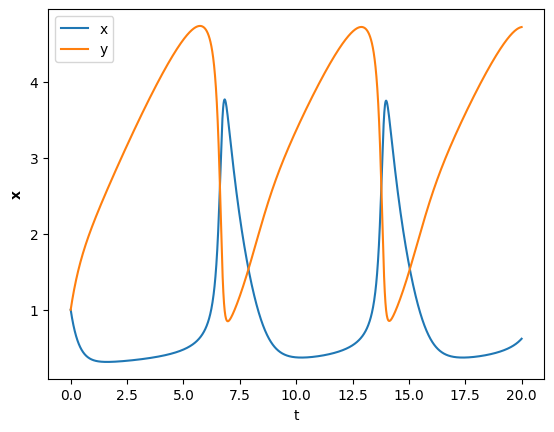

In [73]:
#Set up the Brusselator system as a function of x (numpy array), t (float) and parameters (numpy array)
def brusselator(x, t, p):
    dx = p[0] + x[0]**2 * x[1] - (p[1] + 1) * x[0]
    dy = p[1] * x[0] - x[0]**2 * x[1]
    return np.array([dx, dy])

#define parameters A and B and form parameter array p
A = 1
B = 3
p = np.array([A, B])

#Set up the initial conditions
x0 = np.array([1, 1])

#Set up t0 and t_f
t0 = 0
t_f = 20

#Choose the time increment delta_max
delta_max = 1e-2

#Solve system using the RK4 method
x, t = solvers.solve_to(brusselator,p, x0, t0, t_f, delta_max, solver = 'RK4')

#plot the time series of x and y against t
plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.show()


b)

The period of the oscillations, rounded to 2 decimal places is T = 7.16.


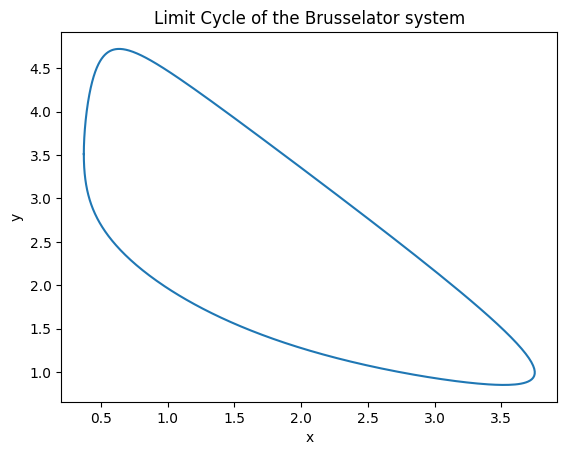

In [79]:
#From the plot of the time series of x and y against t, we can that the period T of the oscillations is approximately 7.5.
#Thus the initial guess for the period T0 is 7.5.
T0 = 7.5

#We will us the shooting method to find the period T of the oscillations
#We will use the default phase condition of shoot_solve, i.e. dx/dt = 0 at t = 0
x_LC,T = solvers.shoot_solve(brusselator, p, x0,T0, delta_max, solver = 'RK4')

#Print the period T of the oscillations to 2 decimal places
print(f'The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = {round(T,2)}.')

xs,_ = solvers.solve_to(brusselator, p, x_LC, t0, T, delta_max, solver = 'RK4')
#Plot x against y for 1 period of the oscillations.
plt.figure()
plt.plot(xs[0,:], xs[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Limit Cycle of the Brusselator system')
plt.show()

c)

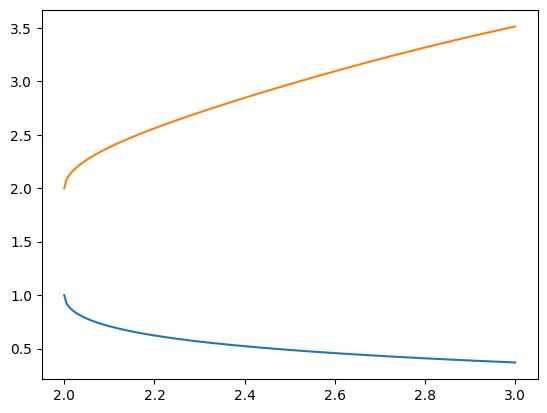

In [80]:
#We will use the output of the shooting method x_LC as the first guess for the natural parameter continuation
#We will use the default phase condition of natural_p_cont, i.e. dx/dt = 0 at t = 0
B0 = 3
Bf = 2
p0 = np.array([A, B0])
pend = np.array([A, Bf])

#We use natural parameter continuation to find the branch of LCs that emerges from the Hopf bifurcation at B = 2
xs, Ts, ps = solvers.natural_p_cont(brusselator, p0, pend, x_LC, LC = True, T0 = T)

#Plot the x and y values of the limit cycles against B
plt.figure()
plt.plot(ps[1,:], xs[0,:], label = 'x')
plt.plot(ps[1,:], xs[1,:], label = 'y')
plt.xlabel('B')
plt.ylabel('x_LC', fontweight = 'bold')
plt.show()

### Question 2 ###

In [111]:
#Set up the extended Hopf Bifurcation normal form
def hopf(x, t, p):
    r_squared = (x**2).sum()
    dx = p[0] * x[0] - x[1] - x[2] + x[0] * r_squared - x[0] * r_squared**2
    dy = x[0] + p[0] * x[1] - x[2] + x[1] * r_squared - x[1] * r_squared**2
    dz = x[0] + x[1] + p[0] * x[2] + x[2] * r_squared - x[2] * r_squared**2
    return np.array([dx, dy, dz])

a)

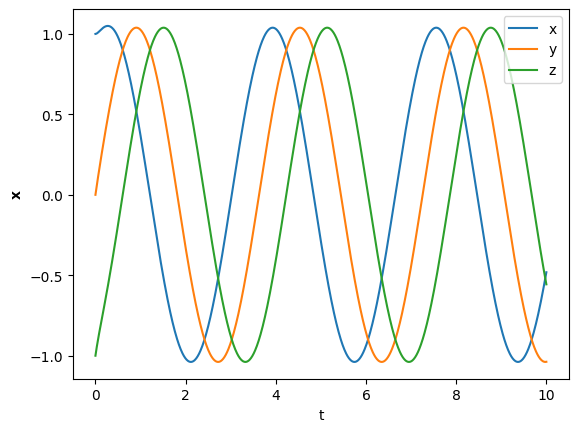

In [112]:
#Set up the parameter value,
beta = 1
#initial conditions,
x0 = np.array([1, 0, -1])
#time domain,
t0 = 0
t_f = 10
#and time increment delta_max.
delta_max = 1e-2

#Solve the system using the RK4 method
x, t = solvers.solve_to(hopf, p, x0, t0, t_f, delta_max, solver = 'RK4')

#Plot the time series of x, y and z against t
plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.plot(t, x[2, :], label = 'z')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.show()

b)

In [84]:
# From the plot of the time series, we can see that the period of the oscillations is approximately 4.
# Thus, the initial guess for the period T0 is 4. 
T0 = 4

#We use the shooting method to find the period T of the oscillations,
#again using default phase condition (dx/dt = 0 at t = 0).
x_LC,T = solvers.shoot_solve(hopf, p, x0,T0, delta_max, solver = 'RK4')
print(f"The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = {round(T,2)}.")

The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = 3.63.


c)

Max iterations reached


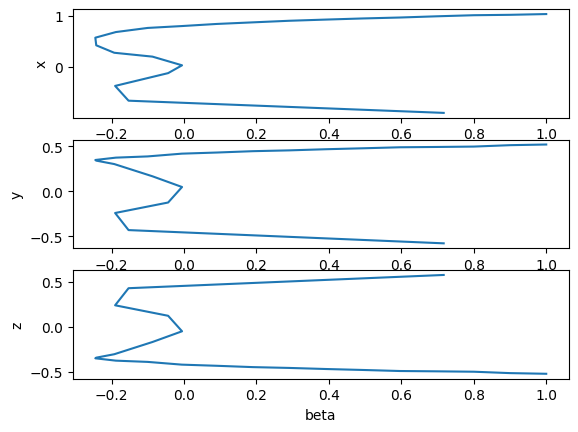

In [103]:
#We will use the outputs x_LC and T of the shooting method initial guesses for the pseudo-arclength continuation.
x0 = x_LC
T0 = T
#As we are starting at beta = 1, and want to investigate the bifurcation at beta = 0,
#the value of the first increment to beta must be negative.

#The exact values of init_h and max_it were chosen as to strike a balance
#between accuracy and computational time, ensuring that the dynamics of the
#system around beta = 0 are fully captured.
innit_h = -1e-1
max_it = 20


#The function pseudo_arc requires the index of the parameter to be varied.
#In this case, there is only one parameter, beta, so the index is 0.
p_ind = 0

xs, Ts, ps = solvers.pseudo_arc(hopf,beta,p_ind,x0,T0 = T,max_it = max_it ,innit_h= innit_h,LC=True)

#Plot the x, y and z values of the limit cycles against beta
plt.figure()
plt.subplot(311)
plt.plot(ps[0,:],xs[0,:], label = 'x')
plt.ylabel('x')
plt.subplot(312)
plt.plot(ps[0,:],xs[1,:], label = 'y')
plt.ylabel('y')
plt.subplot(313)
plt.plot(ps[0,:],xs[2,:], label = 'z')
plt.ylabel('z')
plt.xlabel('beta')
plt.show()


Exercise 3

In [65]:
#We define source term q(x,sig) as a function of x and sig.
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#We define the boundary conditions as Boundary_Condition objects.
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)

#We set the diffusion coefficient D = 1.
D = 1

a)

The value of u(x) at x = 0.0 for sig = 0.5, to 5 significant figures, is -0.69513.
The value of u(x) at x = 0.0 for sig = 0.1, to 5 significant figures, is -0.53936.


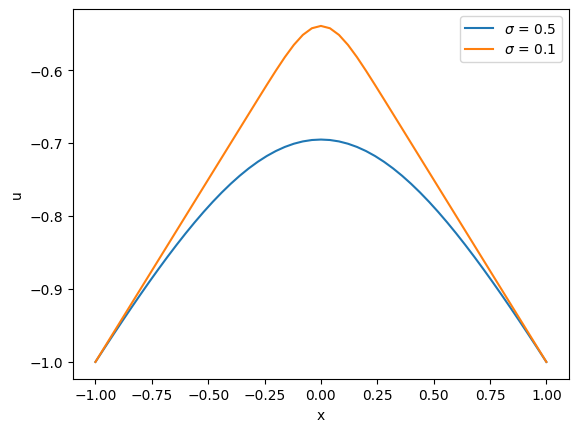

In [116]:
#For 51 grid points, we must input N = 50 to the second order solver.
N=50

#i)
#We define the value of parameter sig = 0.5,
sig = 0.5
#and use numpy linear solver.
solver = "np_solve"

#We solve the system using the second order solver.
u_np,x = solvers.second_order_solve(bc_left,bc_right,q,sig,N, D=D,solver = solver)

#We want to print u(x) at x = 0.
#As x = 0 is the 25th grid point, we print u_np[25].
print(f"The value of u(x) at x = {x[25]} for sig = {sig}, to 5 significant figures, is {round(u_np[25],5)}.")


#ii)
#We define the value of parameter sig = 0.1,
sig = 0.1
#and use the scipy sparse matrix linear solver.
solver = "sparse"
u_sparse,x = solvers.second_order_solve(bc_left,bc_right,q,sig,N,D=D, solver = solver)
print(f"The value of u(x) at x = {x[25]} for sig = {sig}, to 5 significant figures, is {round(u_sparse[25],5)}.")

#We plot the solutions u(x) for sig = 0.5 and sig = 0.1.
plt.plot(x,u_np,label = f"$\sigma$ = 0.5")
plt.plot(x,u_sparse,label = f"$\sigma$ = 0.1")
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

b)

In [110]:
#We will compare the time taken per iteration for the numpy linear solver and the scipy sparse matrix linear solver.
#The setup code is the same for both methods.
setup = """
import solvers
import numpy as np
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#setup both boundary conditions
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)

#initialise parameters of the problem
N = 500
sig = 0.05
D = 1
"""


timed_code_np = """
#define the solver to be used
solver = "np_solve"
u,x = solvers.second_order_solve(bc_left,bc_right,q,sig,N,D=D, solver = solver)
"""
timed_code_sparse = """
#define the solver to be used
solver = "sparse"
u,x = solvers.second_order_solve(bc_left,bc_right,q,sig,N,D=D, solver = solver)
"""

#We will time the code for 500 iterations and calculate the time taken per iteration.
number = 100
time_np = timeit.timeit(setup = setup, stmt = timed_code_np, number = number)
time_sparse = timeit.timeit(setup = setup, stmt = timed_code_sparse, number = number)

print("Numerical integration using the numpy linear system solver took {0:.2f} ms per iteration.".format(1000 * time_np/50))
print("Numerical integration using the scipy sparse matrix linear system solver took {0:.2f} ms per iteration.".format(1000 * time_sparse/50))

Numerical integration using the numpy linear system solver took 31.52 ms per iteration.
Numerical integration using the scipy sparse matrix linear system solver took 1.44 ms per iteration.


Scipy's sparse linear system solver was faster than numpy's dense matrix linear system solver by a factor of over 20 per iteration.

### Question 4 ###

In [120]:
#Define problem parameters
D = 0.5
L =2
t0,T = 0, 0.5
N = 100

#define the source term q(x,t) = 0
def q(u,x,t,p):
    return np.zeros(len(x))

#setup boundary conditions
bc_left = solvers.Boundary_Condition("Neumann",0,1)
bc_right = solvers.Boundary_Condition("Dirichlet",L,0)

#define initial condition f(x,t0) = u(x,0)
def f(x,t0):
    return  0.5 * x * (L - x)

a)    
The maximum time step that can be used in the explicit euler method is given by $\Delta t_{max} = \frac{(\Delta x)^2}{2D}$, where $\Delta x$ is the step size of the discretisation of the space variable and $D$ is the diffusion coefficient.

In [121]:
#Compute discretisation of space by making a grid object
grid = solvers.Grid(N,0,L)
#find maximum step size that can be used for explicit Euler method 
dt_max = grid.dx**2/(2*D)

print(f"The maximum time step size for the explicit Euler method is {dt_max}.")

The maximum time step size for the explicit Euler method is 0.0004.


b)

The value of u(0,T) for the explicit Euler method, rounded to 5 significant figures, is -0.2496. 
The value of u(0,T) for the implicit Euler method, rounded to 5 significant figures, is -0.2496. 


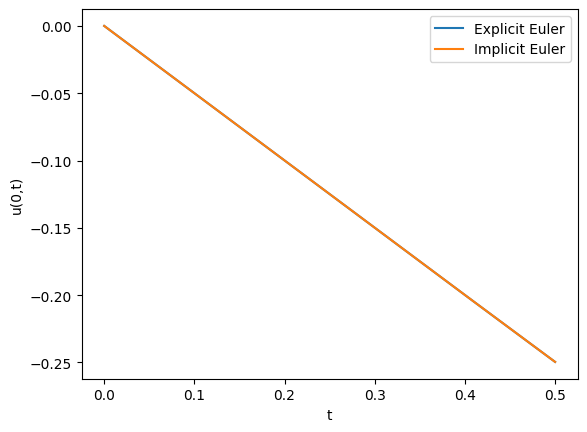

In [124]:
#i)
#We define time step size and solver for explicit Euler method
dt_explicit = 0.5 * dt_max 
explicit_solver = "Euler"

u_explicit,x,t_explicit = solvers.diffusion_solve(bc_left,bc_right,f,t0,T,q,p = 0,N=N, D = D, dt = dt_explicit,explicit_solver = explicit_solver)

#The first dimension of the solution array u_explicit is the spatial dimension, 
#and the second dimension is the time dimension. Thus the value of u(0,T) is u_explicit[0,-1].
print("The value of u(0,T) for the explicit Euler method, rounded to 5 significant figures, is {0:.4f}. ".format(u_explicit[0,-1]))


#ii)
#We define time step size and solver for implicit Euler method.
#We use scipy sparse matrix solver to solve the system of equations that arises from
#the implicit Euler method. 
dt_implicit = 2 * dt_max
implicit_solver = "sparse"
#Note that diffusion_solve will employ explicit method iunless implicit_solver is specified.

u_implicit,x,t_implicit = solvers.diffusion_solve(bc_left,bc_right,f,t0,T,q,p = 0,N=N, D = D, dt = dt_implicit,implicit_solver = implicit_solver)
print("The value of u(0,T) for the implicit Euler method, rounded to 5 significant figures, is {0:.4f}. ".format(u_implicit[0,-1]))

#Plot u(0,t) against t for both methods
plt.figure()
plt.plot(t_explicit,u_explicit[0,:], label = "Explicit Euler")
plt.plot(t_implicit,u_implicit[0,:], label = "Implicit Euler")
plt.xlabel('t')
plt.ylabel('u(0,t)')
plt.legend()
plt.show()

Question 5

In [125]:
#Define the parameters of the problem
D = 0.01
L = 6
T = 100
bc_left = solvers.Boundary_Condition("Neumann",0,0)
bc_right = solvers.Boundary_Condition("Neumann",L,0)

#Define the reaction term q(u,x,t,p)
def q(u,x,t,p):
    return (1-u)**2 * np.exp(-x)

#Define initial condition f(x,t0)
def f(x,t0):
    return np.zeros(len(x))


a)     
We will solve this problem using the IMEX method. The linear systems that arise will be solved with the Thomas algorithm and using Scipy's sparse matrix solver.

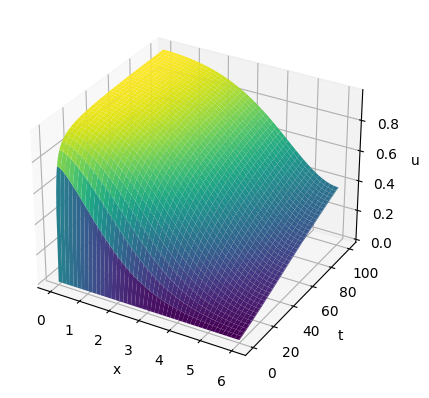

In [127]:

solver_implicit = "thomas"
N = 600

us,xs,ts = solvers.diffusion_solve(bc_left, bc_right, f,0,T, q , p, N, D = D,implicit_solver = solver_implicit, dt = 0.5)
solvers.plot_3D_sol(us,xs,ts)

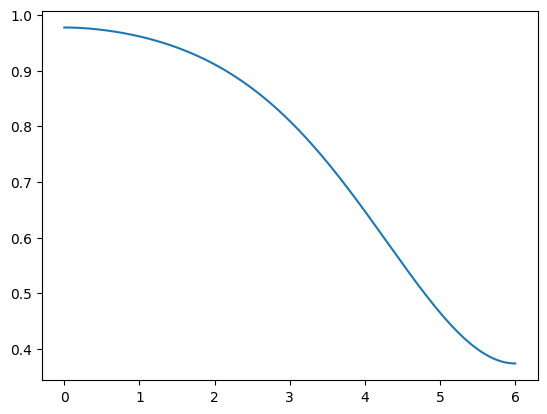

In [236]:
#Question 6


(11, 26)